In [108]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [110]:
# Встановлюємо стиль для графіків
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [112]:
# Завантажуємо дані
file_path = r"C:\Users\user\Downloads\_ab_test_data.csv"
df = pd.read_csv(file_path)

print("=" * 70)
print("A/B TEST ANALYSIS - Аналіз результатів тесту")
print("=" * 70)

A/B TEST ANALYSIS - Аналіз результатів тесту


In [114]:
# Конвертуємо timestamp в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [116]:
# КРОК 1: Базова інформація про тест
# ============================================================================
print("\n📊 КРОК 1: ЗАГАЛЬНА ІНФОРМАЦІЯ ПРО A/B ТЕСТ")
print("-" * 70)


📊 КРОК 1: ЗАГАЛЬНА ІНФОРМАЦІЯ ПРО A/B ТЕСТ
----------------------------------------------------------------------


In [118]:
# Кількість користувачів в кожній групі
users_a = df[df['test_group'] == 'a'].shape[0]
users_b = df[df['test_group'] == 'b'].shape[0]


In [120]:
print(f"Кількість користувачів:")
print(f"  • Група A (контрольна): {users_a}")
print(f"  • Група B (експериментальна): {users_b}")
print(f"  • Загалом: {users_a + users_b}")

Кількість користувачів:
  • Група A (контрольна): 10013
  • Група B (експериментальна): 9985
  • Загалом: 19998


In [122]:
# Кількість конверсій
conversions_a = df[df['test_group'] == 'a']['conversion'].sum()
conversions_b = df[df['test_group'] == 'b']['conversion'].sum()

print(f"\nКількість конверсій:")
print(f"  • Група A: {conversions_a}")
print(f"  • Група B: {conversions_b}")


Кількість конверсій:
  • Група A: 611
  • Група B: 889


In [124]:
# Рівень конверсії
conversion_rate_a = conversions_a / users_a
conversion_rate_b = conversions_b / users_b

print(f"\nРівень конверсії:")
print(f"  • Група A: {conversion_rate_a:.4f} ({conversion_rate_a*100:.2f}%)")
print(f"  • Група B: {conversion_rate_b:.4f} ({conversion_rate_b*100:.2f}%)")
print(f"  • Різниця: {(conversion_rate_b - conversion_rate_a):.4f} ({(conversion_rate_b - conversion_rate_a)*100:.2f}%)")
print(f"  • Відносне покращення: {((conversion_rate_b - conversion_rate_a) / conversion_rate_a * 100):.2f}%")


Рівень конверсії:
  • Група A: 0.0610 (6.10%)
  • Група B: 0.0890 (8.90%)
  • Різниця: 0.0280 (2.80%)
  • Відносне покращення: 45.91%


In [126]:
# Дати тесту
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
duration = (end_date - start_date).days

print(f"\nТривалість тесту:")
print(f"  • Дата початку: {start_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"  • Дата завершення: {end_date.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"  • Тривалість: {duration} днів")


Тривалість тесту:
  • Дата початку: 2023-07-03 01:42:34
  • Дата завершення: 2023-07-25 01:41:19
  • Тривалість: 21 днів


In [128]:
print("\n" + "=" * 70)
print("📈 КРОК 2: СТАТИСТИЧНЕ ТЕСТУВАННЯ ГІПОТЕЗ")
print("-" * 70)

print("\n🔍 Використовуємо Z-test для двох пропорцій (Two-Proportion Z-Test)")
print("\nОбґрунтування вибору:")
print("  • Порівнюємо дві пропорції (conversion rates)")
print("  • Великий розмір вибірки (n > 30 для обох груп)")
print("  • Бінарний результат (конверсія: так/ні)")



📈 КРОК 2: СТАТИСТИЧНЕ ТЕСТУВАННЯ ГІПОТЕЗ
----------------------------------------------------------------------

🔍 Використовуємо Z-test для двох пропорцій (Two-Proportion Z-Test)

Обґрунтування вибору:
  • Порівнюємо дві пропорції (conversion rates)
  • Великий розмір вибірки (n > 30 для обох груп)
  • Бінарний результат (конверсія: так/ні)


In [130]:
# Формулюємо гіпотези
print("\n📋 Гіпотези:")
print("  H₀ (нульова): Conversion_rate_A = Conversion_rate_B")
print("  H₁ (альтернативна): Conversion_rate_A ≠ Conversion_rate_B")
print("  Рівень значущості: α = 0.05")



📋 Гіпотези:
  H₀ (нульова): Conversion_rate_A = Conversion_rate_B
  H₁ (альтернативна): Conversion_rate_A ≠ Conversion_rate_B
  Рівень значущості: α = 0.05


In [132]:
# Розрахунок Z-статистики для двох пропорцій
n_a = users_a
n_b = users_b
p_a = conversion_rate_a
p_b = conversion_rate_b


In [134]:
# Об'єднана пропорція
p_pool = (conversions_a + conversions_b) / (n_a + n_b)

# Стандартна помилка
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_a + 1/n_b))

# Z-статистика
z_stat = (p_b - p_a) / se

# P-value (двосторонній тест)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print(f"\n📊 Результати тесту:")
print(f"  • Об'єднана пропорція (p_pool): {p_pool:.4f}")
print(f"  • Стандартна помилка (SE): {se:.4f}")
print(f"  • Z-статистика: {z_stat:.4f}")
print(f"  • P-value: {p_value:.6f}")


📊 Результати тесту:
  • Об'єднана пропорція (p_pool): 0.0750
  • Стандартна помилка (SE): 0.0037
  • Z-статистика: 7.5197
  • P-value: 0.000000


In [136]:
# 95% довірчий інтервал для різниці
diff = p_b - p_a
ci_margin = 1.96 * se
ci_lower = diff - ci_margin
ci_upper = diff + ci_margin

print(f"\n📐 95% Довірчий інтервал для різниці:")
print(f"  • Різниця: {diff:.4f} ({diff*100:.2f}%)")
print(f"  • Довірчий інтервал: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"  • В процентах: [{ci_lower*100:.2f}%, {ci_upper*100:.2f}%]")



📐 95% Довірчий інтервал для різниці:
  • Різниця: 0.0280 (2.80%)
  • Довірчий інтервал: [0.0207, 0.0353]
  • В процентах: [2.07%, 3.53%]


In [138]:
# Висновок
print("\n✅ ВИСНОВОК:")
if p_value < 0.05:
    print(f"  P-value ({p_value:.6f}) < 0.05")
    print("  ➡️ ВІДХИЛЯЄМО нульову гіпотезу")
    print("  ➡️ Є статистично значуща різниця між групами!")
    if conversion_rate_b > conversion_rate_a:
        print("  ➡️ Група B показує КРАЩІ результати")
    else:
        print("  ➡️ Група A показує КРАЩІ результати")
else:
    print(f"  P-value ({p_value:.6f}) >= 0.05")
    print("  ➡️ НЕ МОЖЕМО відхилити нульову гіпотезу")
    print("  ➡️ Немає статистично значущої різниці між групами")


✅ ВИСНОВОК:
  P-value (0.000000) < 0.05
  ➡️ ВІДХИЛЯЄМО нульову гіпотезу
  ➡️ Є статистично значуща різниця між групами!
  ➡️ Група B показує КРАЩІ результати


In [140]:
# КРОК 3: Візуалізація з довірчими інтервалами
print("\n" + "=" * 70)
print("📊 КРОК 3: ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ")
print("-" * 70)


📊 КРОК 3: ВІЗУАЛІЗАЦІЯ РЕЗУЛЬТАТІВ
----------------------------------------------------------------------


In [142]:
# Обчислюємо довірчі інтервали для кожної групи
def calculate_ci(conversions, n, confidence=0.95):
    """Обчислює довірчий інтервал для пропорції"""
    p = conversions / n
    z = stats.norm.ppf(1 - (1 - confidence) / 2)
    se = np.sqrt(p * (1 - p) / n)
    margin = z * se
    return p - margin, p + margin

ci_a = calculate_ci(conversions_a, users_a)
ci_b = calculate_ci(conversions_b, users_b)

✅ Графік збережено: ab_test_results.png


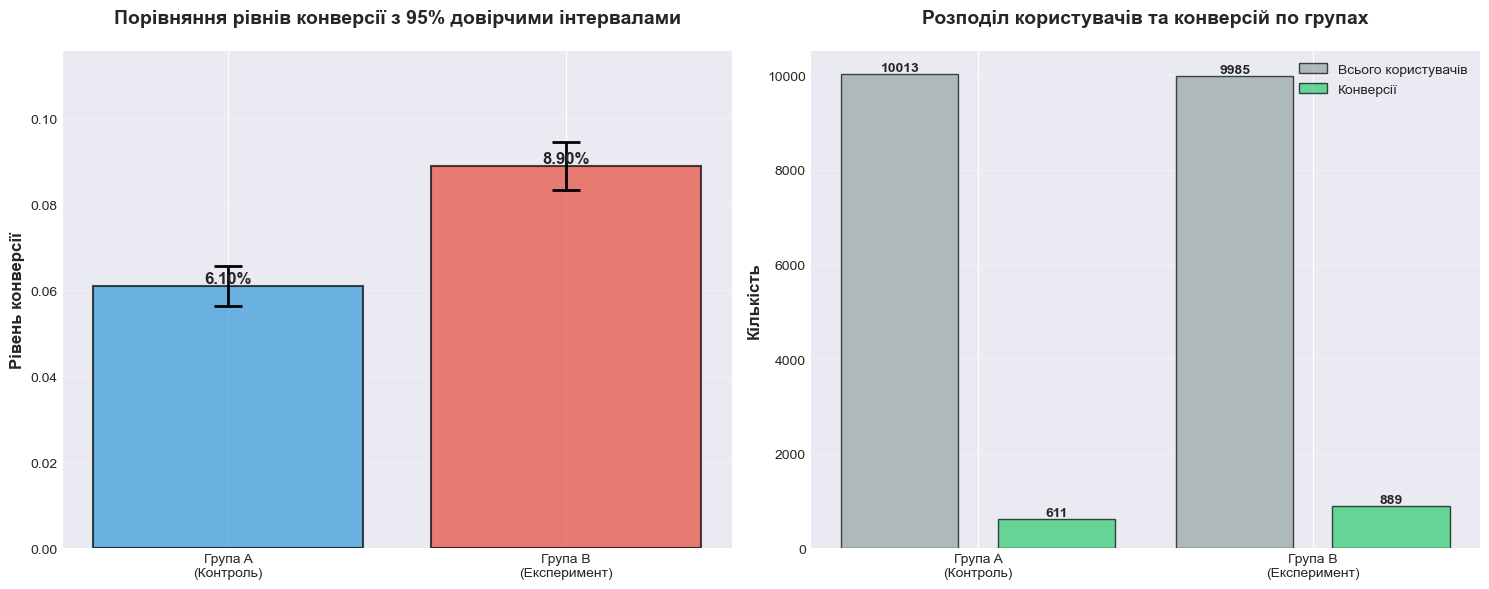

In [160]:
# Створюємо графік
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
# Графік 1: Порівняння conversion rates з CI
groups = ['Група A\n(Контроль)', 'Група B\n(Експеримент)']
rates = [conversion_rate_a, conversion_rate_b]
errors = [(conversion_rate_a - ci_a[0], ci_a[1] - conversion_rate_a),
          (conversion_rate_b - ci_b[0], ci_b[1] - conversion_rate_b)]

colors = ['#3498db', '#e74c3c']
bars = ax1.bar(groups, rates, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.errorbar(groups, rates, yerr=np.array(errors).T, fmt='none', 
             color='black', capsize=10, capthick=2, linewidth=2)
# Додаємо значення на стовпчики
for i, (bar, rate) in enumerate(zip(bars, rates)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{rate*100:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

ax1.set_ylabel('Рівень конверсії', fontsize=12, fontweight='bold')
ax1.set_title('Порівняння рівнів конверсії з 95% довірчими інтервалами', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_ylim(0, max(rates) * 1.3)
ax1.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Графік 2: Кількість користувачів та конверсій
x = np.arange(len(groups))
width = 0.35

bars1 = ax2.bar(x - width/1.5, [users_a, users_b], width, label='Всього користувачів',
                color='#95a5a6', alpha=0.7, edgecolor='black')
bars2 = ax2.bar(x + width/1.5, [conversions_a, conversions_b], width, 
                label='Конверсії', color='#2ecc71', alpha=0.7, edgecolor='black')

# Додаємо значення
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_ylabel('Кількість', fontsize=12, fontweight='bold')
ax2.set_title('Розподіл користувачів та конверсій по групах', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(groups)
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('ab_test_results.png', dpi=300, bbox_inches='tight')
print("✅ Графік збережено: ab_test_results.png")
plt.show()


In [162]:
print("\n" + "=" * 70)
print("🎁 БОНУС: КОНВЕРСІЯ В ЧАСІ")
print("-" * 70)


🎁 БОНУС: КОНВЕРСІЯ В ЧАСІ
----------------------------------------------------------------------


In [164]:
# Групуємо по датах
df['date'] = df['timestamp'].dt.date

# Обчислюємо денну конверсію для кожної групи
daily_stats = df.groupby(['date', 'test_group']).agg({
    'conversion': ['sum', 'count']
}).reset_index()

daily_stats.columns = ['date', 'test_group', 'conversions', 'users']
daily_stats['conversion_rate'] = daily_stats['conversions'] / daily_stats['users']


✅ Графік збережено: conversion_over_time.png


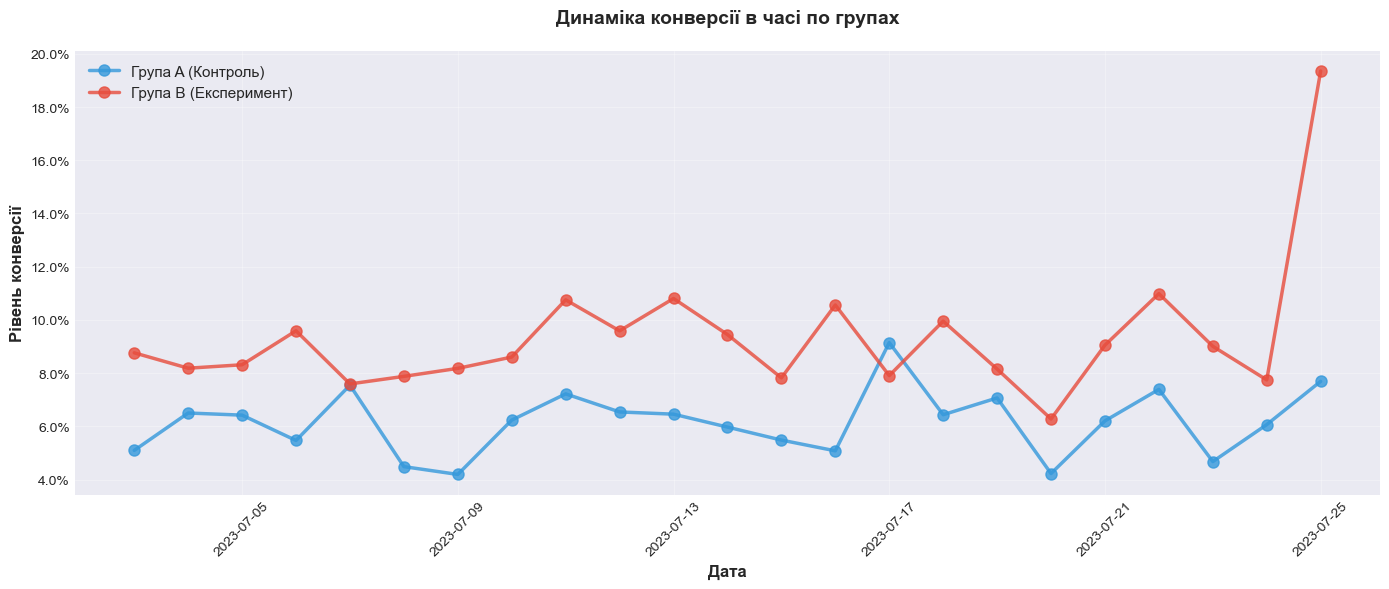

In [166]:
# Створюємо графік
fig, ax = plt.subplots(figsize=(14, 6))

for group in ['a', 'b']:
    data = daily_stats[daily_stats['test_group'] == group]
    label = 'Група A (Контроль)' if group == 'a' else 'Група B (Експеримент)'
    color = '#3498db' if group == 'a' else '#e74c3c'
    
    ax.plot(data['date'], data['conversion_rate'], 
            marker='o', linewidth=2.5, markersize=8, 
            label=label, color=color, alpha=0.8)

ax.set_xlabel('Дата', fontsize=12, fontweight='bold')
ax.set_ylabel('Рівень конверсії', fontsize=12, fontweight='bold')
ax.set_title('Динаміка конверсії в часі по групах', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Форматуємо вісь Y у відсотки
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

plt.tight_layout()
plt.savefig('conversion_over_time.png', dpi=300, bbox_inches='tight')
print("✅ Графік збережено: conversion_over_time.png")
plt.show()

In [168]:
# Аналіз тренду
print("\n📈 Аналіз тренду:")
for group in ['a', 'b']:
    data = daily_stats[daily_stats['test_group'] == group].sort_values('date')
    group_name = 'Група A' if group == 'a' else 'Група B'
    
    # Обчислюємо середню конверсію
    mean_conv = data['conversion_rate'].mean()
    std_conv = data['conversion_rate'].std()
    
    print(f"\n  {group_name}:")
    print(f"    • Середня конверсія: {mean_conv:.4f} ({mean_conv*100:.2f}%)")
    print(f"    • Стандартне відхилення: {std_conv:.4f}")
    print(f"    • Мін: {data['conversion_rate'].min():.4f}, Макс: {data['conversion_rate'].max():.4f}")



📈 Аналіз тренду:

  Група A:
    • Середня конверсія: 0.0616 (6.16%)
    • Стандартне відхилення: 0.0123
    • Мін: 0.0419, Макс: 0.0915

  Група B:
    • Середня конверсія: 0.0933 (9.33%)
    • Стандартне відхилення: 0.0249
    • Мін: 0.0628, Макс: 0.1935


In [170]:
print("\n" + "=" * 70)
print("📝 ФІНАЛЬНИЙ ВИСНОВОК ТА РЕКОМЕНДАЦІЇ")
print("=" * 70)



📝 ФІНАЛЬНИЙ ВИСНОВОК ТА РЕКОМЕНДАЦІЇ


In [172]:
print(f"\n1️⃣ РЕЗУЛЬТАТИ ТЕСТУ:")
print(f"   • Група A (контроль): {conversion_rate_a*100:.2f}% конверсії")
print(f"   • Група B (експеримент): {conversion_rate_b*100:.2f}% конверсії")
print(f"   • Абсолютна різниця: {(conversion_rate_b - conversion_rate_a)*100:.2f}%")
print(f"   • Відносне покращення: {((conversion_rate_b - conversion_rate_a) / conversion_rate_a * 100):.2f}%")
print(f"\n2️⃣ СТАТИСТИЧНА ЗНАЧУЩІСТЬ:")
print(f"   • P-value: {p_value:.6f}")
print(f"   • Z-статистика: {z_stat:.4f}")
if p_value < 0.05:
    print(f"   • ✅ Різниця СТАТИСТИЧНО ЗНАЧУЩА (p < 0.05)")
else:
    print(f"   • ❌ Різниця НЕ є статистично значущою (p >= 0.05)")

print(f"\n3️⃣ РЕКОМЕНДАЦІЯ:")
if p_value < 0.05 and conversion_rate_b > conversion_rate_a:
    print(f"   ✅ ВПРОВАДЖУВАТИ зміни з групи B")
    print(f"   • Є чіткі докази покращення конверсії")
    print(f"   • Результат статистично надійний")
elif p_value < 0.05 and conversion_rate_b < conversion_rate_a:
    print(f"   ❌ НЕ впроваджувати зміни з групи B")
    print(f"   • Група B показує гірші результати")
else:
    print(f"   ⚠️ ПРОДОВЖИТИ тестування або залишити як є")
    print(f"   • Недостатньо доказів для впровадження змін")
    print(f"   • Розгляньте збільшення розміру вибірки")

print("\n" + "=" * 70)
print("Аналіз завершено! 🎉")
print("=" * 70)



1️⃣ РЕЗУЛЬТАТИ ТЕСТУ:
   • Група A (контроль): 6.10% конверсії
   • Група B (експеримент): 8.90% конверсії
   • Абсолютна різниця: 2.80%
   • Відносне покращення: 45.91%

2️⃣ СТАТИСТИЧНА ЗНАЧУЩІСТЬ:
   • P-value: 0.000000
   • Z-статистика: 7.5197
   • ✅ Різниця СТАТИСТИЧНО ЗНАЧУЩА (p < 0.05)

3️⃣ РЕКОМЕНДАЦІЯ:
   ✅ ВПРОВАДЖУВАТИ зміни з групи B
   • Є чіткі докази покращення конверсії
   • Результат статистично надійний

Аналіз завершено! 🎉
